# Projeto

## Importando bibliotecas e carregando o dataset

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
ROOT_PATH_DATASET = 'teste_indicium_precificacao.csv'
dataset = pd.read_csv(ROOT_PATH_DATASET)

## Iniciando a fase de exploração dos dados

In [28]:
dataset.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [29]:
dataset.columns

Index(['id', 'nome', 'host_id', 'host_name', 'bairro_group', 'bairro',
       'latitude', 'longitude', 'room_type', 'price', 'minimo_noites',
       'numero_de_reviews', 'ultima_review', 'reviews_por_mes',
       'calculado_host_listings_count', 'disponibilidade_365'],
      dtype='object')

In [30]:
standard_language_columns = {
    "nome": "name",
    "bairro_group": "neighborhood_group",
    "bairro": "neighborhood",
    "minimo_noites": "minimum_nights",
    "numero_de_reviews": "number_of_reviews",
    "ultima_review": "last_review",
    "reviews_por_mes": "reviews_per_month",
    "calculado_host_listings_count": "calculated_host_listings_count",
    "disponibilidade_365": "availability_365",
}
dataset.rename(columns=standard_language_columns, inplace=True)

In [31]:
dataset.head()

,id,name,host_id,host_name,neighborhood_group,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


Visualizando informações sobre a estrutura dos dados

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48894 non-null  int64  
 1   name                            48878 non-null  object 
 2   host_id                         48894 non-null  int64  
 3   host_name                       48873 non-null  object 
 4   neighborhood_group              48894 non-null  object 
 5   neighborhood                    48894 non-null  object 
 6   latitude                        48894 non-null  float64
 7   longitude                       48894 non-null  float64
 8   room_type                       48894 non-null  object 
 9   price                           48894 non-null  int64  
 10  minimum_nights                  48894 non-null  int64  
 11  number_of_reviews               48894 non-null  int64  
 12  last_review                     

Visualizando quantidade de valores nulos

In [33]:
dataset.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighborhood_group                    0
neighborhood                          0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Removendo campos irrelevantes para a análise e predição

In [34]:
dataset = dataset.drop(columns=["name", "host_name"])

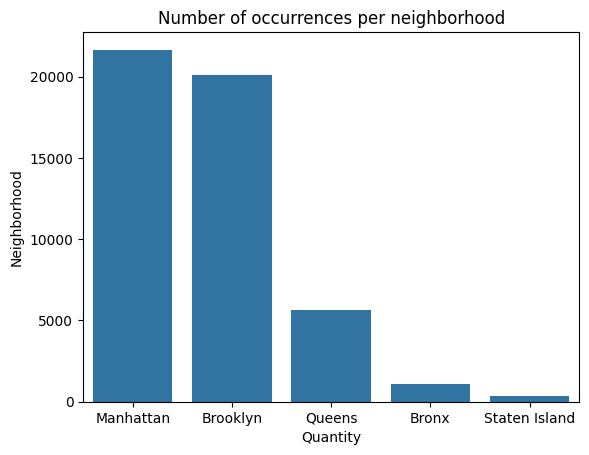

In [36]:
neighborhood_group = dataset['neighborhood_group'].value_counts().reset_index()
neighborhood_group.columns = ['neighborhood', 'quantity']
plt.ylabel("Neighborhood")
plt.xlabel("Quantity")
plt.title("Number of occurrences per neighborhood")
sns.barplot(data=neighborhood_group, x='neighborhood', y='quantity', orient='v')
plt.show()